# CEIA - VISIÓN POR COMPUTADORA
## TP1 - Integrantes
###
* Ruiz Otondo, Juan
* Torres, Dimas
* Villanueva, Cecilia Azul

## Parte 1

### 1 - Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [56]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from ipywidgets import interact, FloatSlider, fixed, Dropdown
from IPython.display import display

In [57]:
# Folder path
folder_path = '.\coord_cromaticas'

# List to store images
images_rgb = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
 
        # Read the image using OpenCV
        img = cv.imread(os.path.join(folder_path, filename))

        # If image is read correctly, add it to the list converted from BGR to RGB
        if img is not None:
            images_rgb.append(cv.cvtColor(img, cv.COLOR_BGR2RGB))



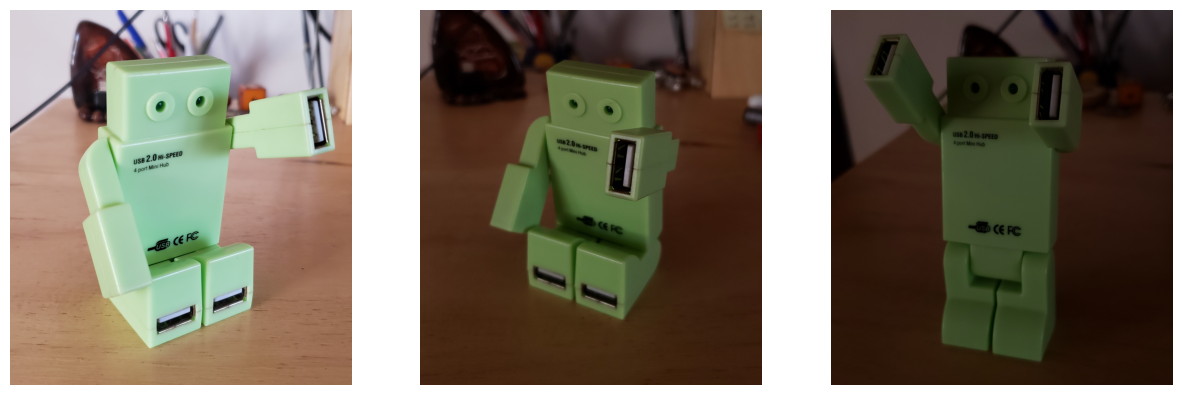

In [58]:
#Plot Images
plt.figure(figsize=(15, 5))

for i, img in enumerate(images_rgb):
    plt.subplot(1, len(images_rgb), i + 1) 
    plt.imshow(img)  
    plt.axis('off')  

plt.show()


In [59]:
# Function to calculate chromatic coordinates

def chromatic_coordinates(image):
    
    # Sum across the color channels to get a (height, width) array
    channel_sum = np.sum(img, axis=2)

    # Calculate the inverse, adding a small value to avoid division by zero
    inverse_sum = 1.0 / (channel_sum + 1e-6)

    # Reshape the inverse sum to (height, width, 1) to broadcast it across RGB channels
    inverse_sum = inverse_sum[:, :, np.newaxis]

    # Multiply the original image by the inverse sum
    return(img * inverse_sum)

In [60]:
# List to store images
images_chr_coord = []

# Loop through all images
for img in images_rgb:
    images_chr_coord.append(chromatic_coordinates(img))

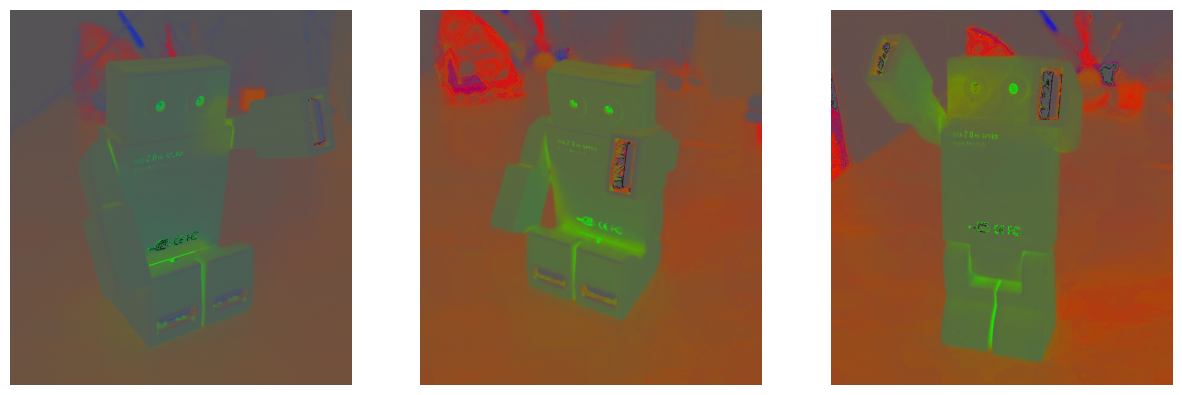

In [61]:
# Plot Images with Chromatic Coordinates
plt.figure(figsize=(15, 5))

for i, img in enumerate( images_chr_coord):
    plt.subplot(1, len( images_chr_coord), i + 1)  
    plt.imshow(img)  
    plt.axis('off') 

plt.show()

### 2 - Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [62]:
# White Patch Normalization
def white_patch (img) :

    # Max value per channel
    max_per_channel = np.max(img, axis=(0,1))

    # Reduce the maximum value by 40% if any of the values are equal to 255
    if np.any(max_per_channel == 255):
       max_per_channel =max_per_channel * 0.6
    
    # Normalize the image
    max_per_channel = max_per_channel.reshape((1, 1, 3))
    norm_per_channel = 255 / max_per_channel
    normalized_image = img * norm_per_channel
    
    return normalized_image.clip(0, 255).astype(np.uint8)


In [63]:
# Folder path
folder_path = '.\white_patch'

# List to store images
images_rgb_wp = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
 
        # Read the image using OpenCV
        img = cv.imread(os.path.join(folder_path, filename))

        # If image is read correctly, add it to the list converted from BGR to RGB
        if img is not None:
            images_rgb_wp.append(cv.cvtColor(img, cv.COLOR_BGR2RGB))


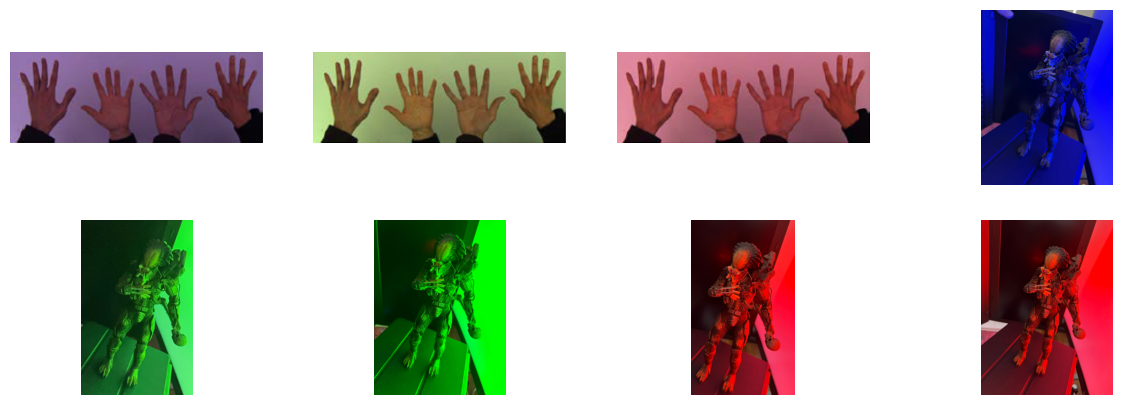

In [64]:
# Plot Original Images
plt.figure(figsize=(15, 5))

for i, img in enumerate(images_rgb_wp):
    plt.subplot(2, 4, i + 1) 
    plt.imshow(img)  
    plt.axis('off')

plt.show()

### 3 - Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [65]:
# Normalize the images using the white patch method
white_patched_images= []

for  img in images_rgb_wp:
    white_patched_images.append(white_patch(img))

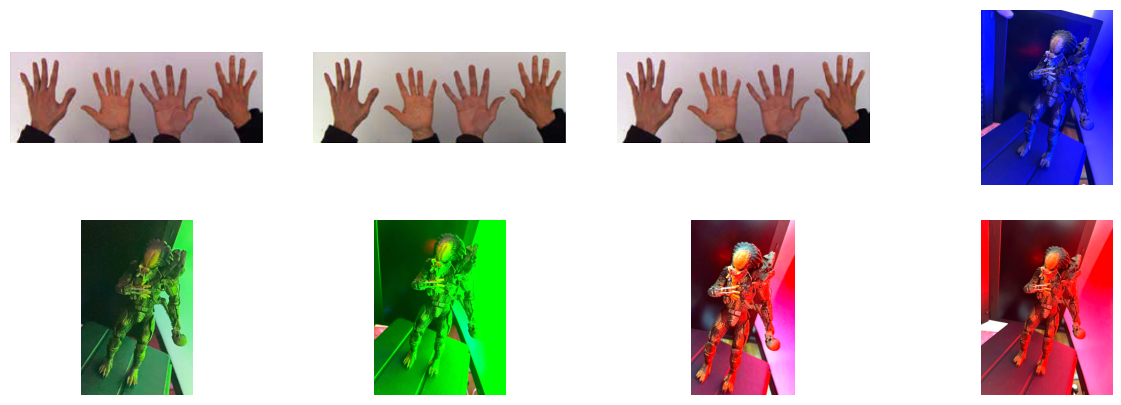

In [66]:
# Plot Original Images with White Patch Normalization
plt.figure(figsize=(15, 5))

for i, img in enumerate(white_patched_images):
    plt.subplot(2, 4, i + 1) 
    plt.imshow(img) 
    plt.axis('off') 

plt.show()

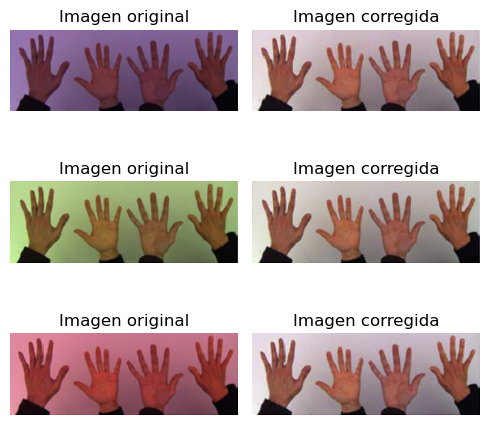

In [67]:
# Plot Original and White Patch Normalized Images
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 5))

for i in range (3):
 
    axes[i, 0].imshow(images_rgb_wp[i])
    axes[i, 0].set_title('Imagen original')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(white_patched_images[i])
    axes[i, 1].set_title('Imagen corregida')
    axes[i, 1].axis('off')


plt.tight_layout()
plt.show()

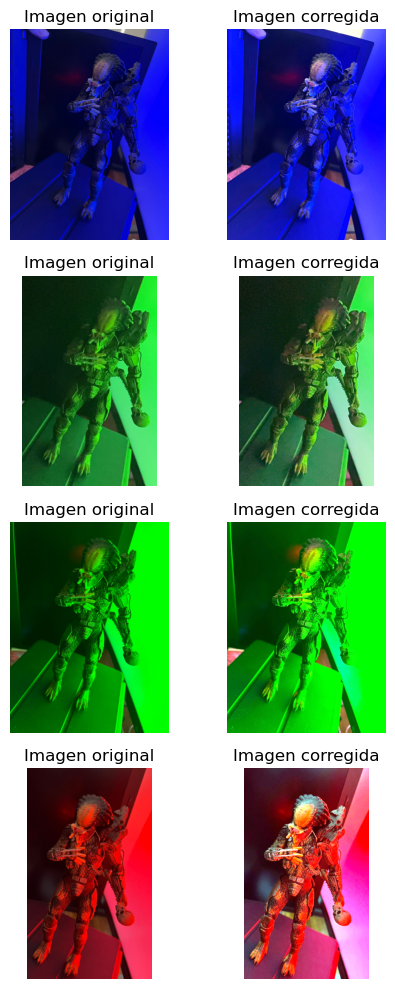

In [68]:
# Plot Original and White Patch Normalized Images
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(5, 10))

for i in range (4):
  
    axes[i, 0].imshow(images_rgb_wp[i+3])
    axes[i, 0].set_title('Imagen original')
    axes[i, 0].axis('off')
  
    axes[i, 1].imshow(white_patched_images[i+3])
    axes[i, 1].set_title('Imagen corregida')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

## Parte 2

 ### 1 - Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas. 


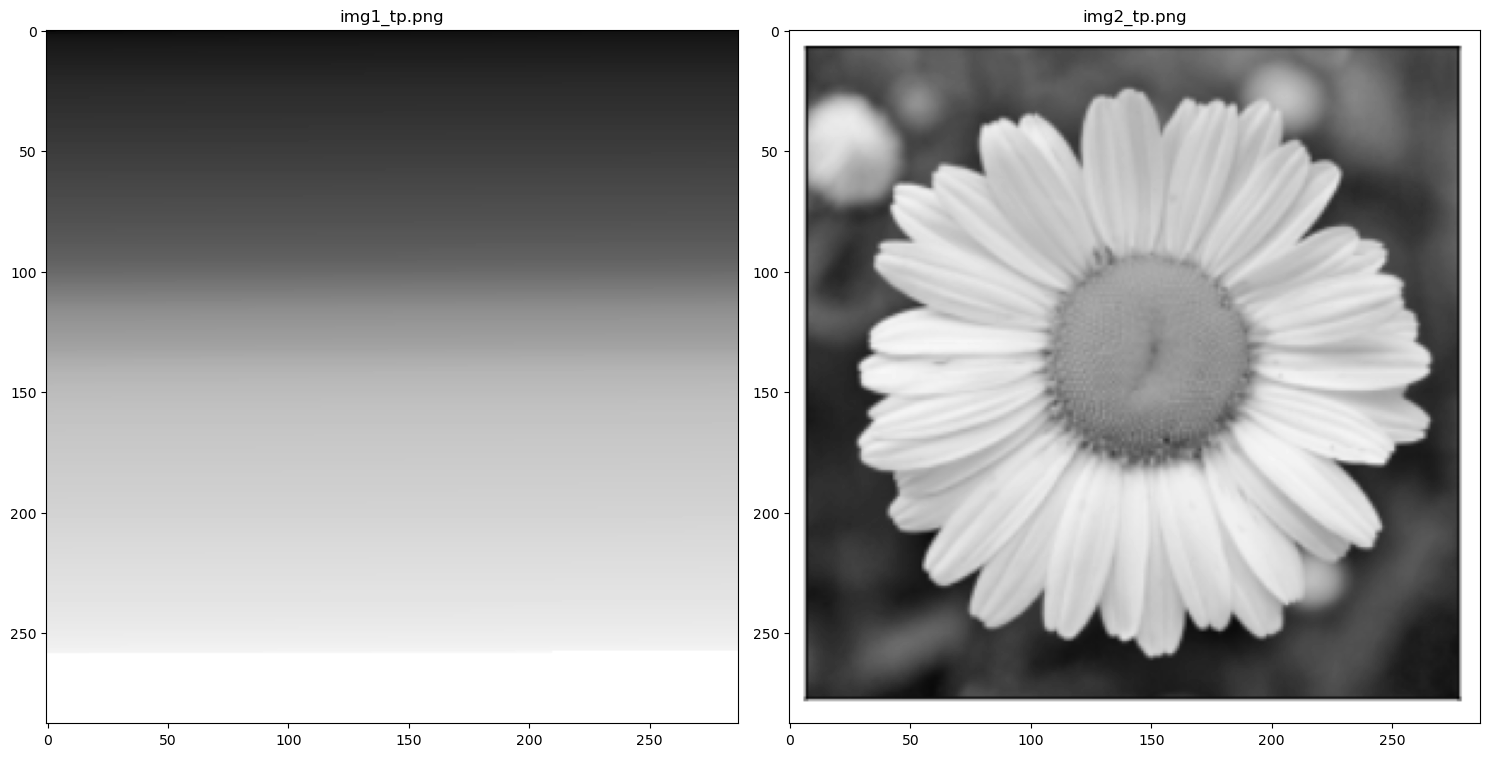

In [69]:
#Read images in grayscale
images_grey = []

images_grey.append(cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE))
images_grey.append(cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Plot images in grayscale
for i in range(len(images_grey)):
   
    axes[i].imshow(images_grey[i],cmap='gray')
    axes[i].set_title(f'img{i+1}_tp.png')
    #axes[i].axis('off')

plt.tight_layout()

### 2 - Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

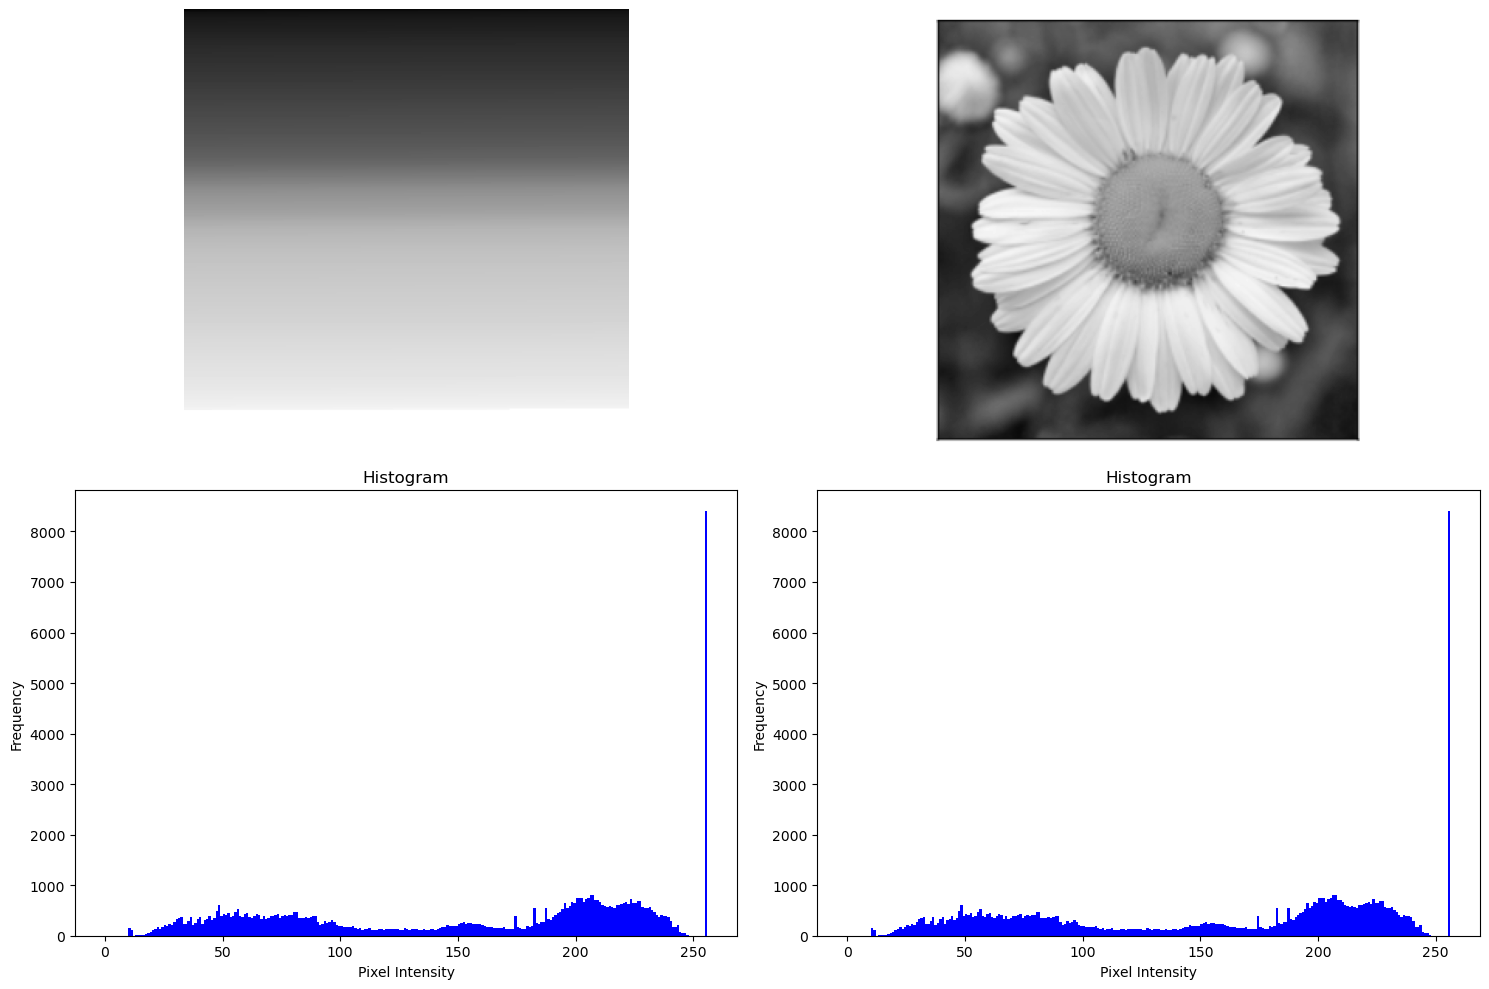

In [70]:
# Plot images in grayscale with histograms
plt.figure(figsize=(15, 10))

# Loop through each image and plot it with histograms
for i, img in enumerate(images_grey):

    # Display image in the first row
    plt.subplot(2, len(images_grey), i + 1)  
    plt.imshow(img, cmap='gray')  # Display image in grayscale
    plt.axis('off')  

    # Display histogram of pixel intensities in the second row
    plt.subplot(2, len(images_grey), len(images_grey) + i + 1) 
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='blue')  # Flatten image to get pixel intensities
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram')

# Show the figure
plt.tight_layout()
plt.show()


Histogramas:

- Valores de Baja Intensidad: ambos histogramas tienen una cantidad considerable de píxeles oscuros (en el rango de 0-100). Esto tiene sentido porque ambas imágenes contienen áreas oscuras significativas como las sombras en la flor y el degradado de negro a gris en la otra imagen.

- Valores de Alta Intensidad: ambos histogramas poseen un pico hacia los valores de intensidad más altos (200-255). Esto refleja las regiones brillantes en ambas imágenes como los pétalos claros en la flor y las áreas más brillantes en el degradado.

Vemos que los histogramas de ambas imagenes son prácticamente idénticos mientras que las imagenes son notablemente distintas.Dado un problema de clasificacion/detección de imagenes no resultaría de utilidad utilizar los histogramas como features.

### 3 -  Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

Text(0.5, 1.0, 'RGB Image')

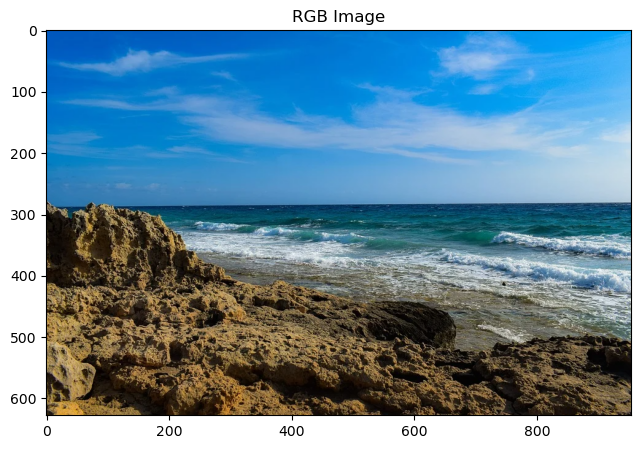

In [39]:
#Read images and convert them to RGB
beach_rgb= cv.cvtColor(cv.imread('segmentacion.png'),cv.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(15, 5))
plt.imshow(beach_rgb)
plt.title("RGB Image")
#plt.axis('off')

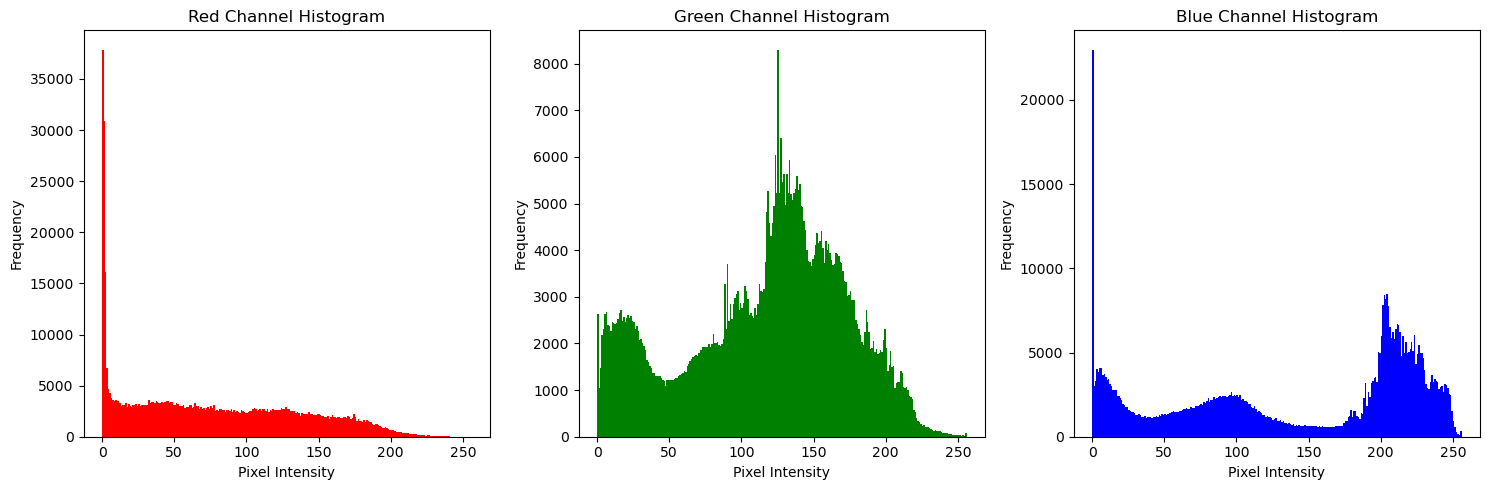

In [40]:
# Plot the histogram for each channel in its own subplot
plt.figure(figsize=(15, 5))

for i, color in enumerate(['red', 'green', 'blue']):
    plt.subplot(1, 3, i + 1) 
    channel_data = beach_rgb[:, :, i].ravel()  # Flatten the channel for histogram plotting
    plt.hist(channel_data, bins=256, range=[0, 256], color=color)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'{color.capitalize()} Channel Histogram')

plt.tight_layout()
plt.show()




**Canal Rojo:**
El canal rojo muestra un pico con intensidades de píxeles muy bajas (cercanas a 0), lo que indica que una porción importante de la imagen tiene regiones oscuras en el espectro rojo. Esto se corresponde con las áreas oscuras de las rocas y las sombras en esta imagen, ya que son zonas que tienen poca aportación del rojo. Por otra parte, las intensidades de los píxeles disminuyen gradualmente, mostrando una distribución más uniforme de los tonos rojos, pero con una frecuencia reducida a medida que aumenta la intensidad (con menos tonos rojos brillantes).

**Canal Verde:**
El canal verde tiene una distribución más equilibrada en comparación con los canales rojo y azul. Hay un pico en el rango de intensidad media (alrededor de 100-150) que se corresponde a los tonos azul verdoso del océano y a los tonos verdes o de brillo medio de la imagen.

**Canal Azul:**
Al igual que en el canal rojo, hay un fuerte pico a intensidades muy bajas, pero es menos pronunciado. Esto tambien está relacionado con las sombras en las rocas. Además, hay una concentración secundaria hacia intensidades altas (200-250) y un ascenso en tonos azules más brillantes. La imagen tiene áreas con sombras de color azul oscuro y regiones de azul brillante, que se corresponden con el cielo y el agua del mar.

In [ ]:
# Function to apply a mask to an image
def mask_image(image,n_sigma, color_mean , color_std ):
   
    mask = cv.inRange(image, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)

    img_segmentada = cv.bitwise_and(image, image, mask=mask)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    axes[0].imshow(image)
    axes[0].set_title('Imagen original')
    axes[0].axis('off')

    axes[1].imshow(img_segmentada)
    axes[1].set_title('Imagen con Mascara')
    axes[1].axis('off')

    plt.tight_layout()


#### Cielo

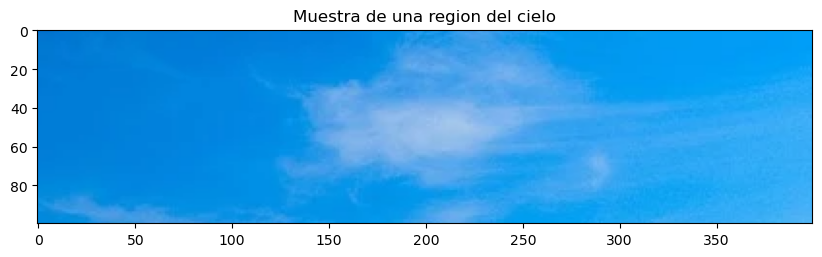

In [49]:
# Take a sample of the sky region
img_sample_sky = beach_rgb[0:100, 500:900,:]

# Calculate the mean and standard deviation of the color channels
color_mean_sky, color_std_sky = cv.meanStdDev(img_sample_sky)

#plt.figure(1)
plt.figure(figsize=(10, 5))
plt.imshow(img_sample_sky)
plt.title('Muestra de una region del cielo')
plt.show()

In [43]:
# Create a slider widget
sigma_slider_sky = FloatSlider(value=0, min=0, max=10, step=0.1, description="Sigma");

#Show the widget and the images
interact(mask_image,image=fixed(beach_rgb), n_sigma=sigma_slider_sky, color_mean=fixed(color_mean_sky), color_std=fixed(color_std_sky));

interactive(children=(FloatSlider(value=0.0, description='Sigma', max=10.0), Output()), _dom_classes=('widget-…

El sigma óptimo es 6 aunque se confunde con zonas dónde hay olas y de la espuma del mar.

#### Agua

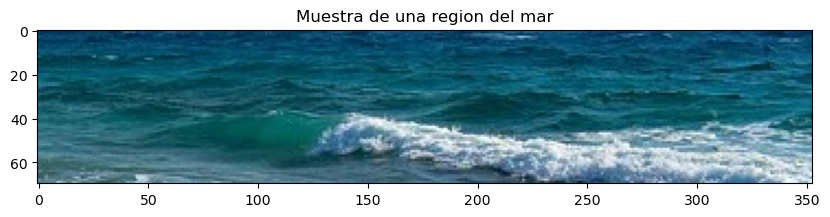

In [54]:
# Take a sample of the sky region
img_sample_sea = beach_rgb[ 290:360,600:1000,:]

# Calculate the mean and standard deviation of the color channels
color_mean_sea, color_std_sea = cv.meanStdDev(img_sample_sea)

#plt.figure(1)
plt.figure(figsize=(10, 5))
plt.imshow(img_sample_sea)
plt.title('Muestra de una region del mar')
plt.show()

In [ ]:
# Create a slider widget
sigma_slider_sea = FloatSlider(value=0, min=0, max=10, step=0.1, description="Sigma");

#Show the widget and the images
interact(mask_image,image=fixed(beach_rgb), n_sigma=sigma_slider_sea, color_mean=fixed(color_mean_sea), color_std=fixed(color_std_sea));


interactive(children=(FloatSlider(value=0.0, description='Sigma', max=10.0), Output()), _dom_classes=('widget-…

El sigma optimo es 1 aunque se confunde con zonas de la orilla donde también hay tierra.

#### Tierra

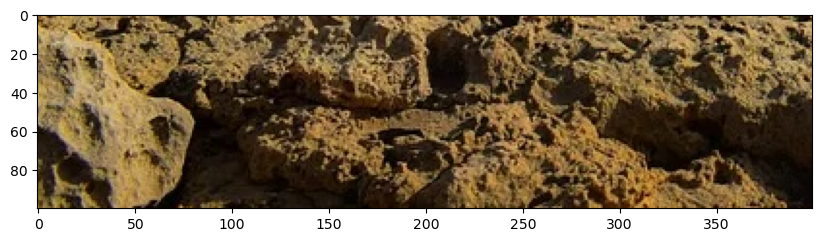

In [46]:
# Take a sample of the sky region
img_sample_ground = beach_rgb[ 500:600,0:400,:]

# Calculate the mean and standard deviation of the color channels
color_mean_ground, color_std_ground = cv.meanStdDev(img_sample_ground)

#plt.figure(1)
plt.figure(figsize=(10, 5))
plt.imshow(img_sample_ground)
plt.show()

In [48]:
# Create a slider widget
sigma_slider_ground= FloatSlider(value=0, min=0, max=10, step=0.1, description="Sigma");

interact(mask_image,image=fixed(beach_rgb), n_sigma=sigma_slider_ground, color_mean=fixed(color_mean_ground), color_std=fixed(color_std_ground));


interactive(children=(FloatSlider(value=0.0, description='Sigma', max=10.0), Output()), _dom_classes=('widget-…

El sigma óptimo es 1.1 y es la región que mejor se puede semgmentar usando este tipo de máscaras (basadas en un modelo estadístico sencillo para caracterizar el color de una región en el espacio RGB).